In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
style.use('seaborn')
sns.set_context('notebook')
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [3]:
covid_data = pd.read_csv(url)
covid_data.shape

(262, 79)

In [4]:
covid_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14


In [5]:
covid_data.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,...,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,21.419981,22.127121,2.118321,2.496183,3.591603,5.473282,8.083969,11.171756,21.290076,23.534351,...,2264.469466,2521.778626,2748.538168,2986.125954,3272.851145,3559.561069,3867.011450,4182.889313,4570.248092,4855.400763
std,24.792328,70.914947,27.486209,27.585152,34.340380,47.792307,66.787825,89.985083,220.845467,222.189584,...,10885.537733,12169.241784,13371.580281,14684.993585,16304.612296,17925.164296,19769.176892,21747.035905,24028.171891,25765.035389
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.135000,-22.036550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,10.250000,12.000000,14.250000,15.000000,18.000000,20.000000,21.250000,21.250000,22.000000
50%,23.659750,20.535638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,100.000000,111.500000,130.000000,139.000000,144.500000,170.000000,176.500000,185.000000,195.500000,214.000000
75%,41.191625,80.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,560.250000,603.500000,643.250000,687.250000,715.500000,780.500000,889.000000,955.000000,986.750000,1020.500000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,101657.000000,121478.000000,140886.000000,161807.000000,188172.000000,213372.000000,243453.000000,275586.000000,308850.000000,337072.000000


In [6]:
covid_data.rename(columns={'Province/State': 'state', 'Country/Region': 'country', 
                            'Lat': 'lat', 'Long': 'long'}, inplace=True)
covid_data.head()

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14


In [7]:
usa = covid_data.loc[covid_data['country'] == 'US']
usa.drop(['state', 'country', 'lat', 'long'], axis=1, inplace=True)
usa

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
225,1,1,2,2,5,5,5,5,5,7,...,101657,121478,140886,161807,188172,213372,243453,275586,308850,337072


In [8]:
usa.values

array([[     1,      1,      2,      2,      5,      5,      5,      5,
             5,      7,      8,      8,     11,     11,     11,     11,
            11,     11,     11,     11,     12,     12,     13,     13,
            13,     13,     13,     13,     13,     13,     15,     15,
            15,     51,     51,     57,     58,     60,     68,     74,
            98,    118,    149,    217,    262,    402,    518,    583,
           959,   1281,   1663,   2179,   2727,   3499,   4632,   6421,
          7783,  13677,  19100,  25489,  33276,  43847,  53740,  65778,
         83836, 101657, 121478, 140886, 161807, 188172, 213372, 243453,
        275586, 308850, 337072]])

In [9]:
# for R code
v = usa.values
np.log(v[:, 48:])

array([[ 6.86589107,  7.1553963 ,  7.41637848,  7.68662133,  7.91095738,
         8.16023249,  8.44074402,  8.76732915,  8.95969715,  9.52347087,
         9.85744361, 10.14600227, 10.4125917 , 10.68846158, 10.89191288,
        11.09404071, 11.33661779, 11.52935968, 11.70748846, 11.85570633,
        11.99415955, 12.14511172, 12.2707924 , 12.40267918, 12.52665502,
        12.640611  , 12.72805184]])

In [10]:
sk = covid_data.loc[covid_data['country'] == 'Korea, South']
sk.drop(['state', 'country', 'lat', 'long'], axis=1, inplace=True)
sk

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
143,1,1,2,2,3,4,4,4,4,11,...,9332,9478,9583,9661,9786,9887,9976,10062,10156,10237


In [11]:
# for R code
v = sk.values
np.log(v[:, 48:])

array([[8.92439013, 8.95609308, 8.97068627, 8.98456837, 8.99788945,
        9.00724452, 9.01627007, 9.02641753, 9.03753341, 9.05543941,
        9.06554579, 9.08239336, 9.10063711, 9.10063711, 9.10908254,
        9.12008738, 9.13140538, 9.14120463, 9.1567286 , 9.16774597,
        9.17585244, 9.18870807, 9.19897604, 9.20793749, 9.21652123,
        9.22581994, 9.23376389]])

In [12]:
italy = covid_data.loc[covid_data['country'] == 'Italy']
italy.drop(['state', 'country', 'lat', 'long'], axis=1, inplace=True)
italy

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
137,0,0,0,0,0,0,0,0,0,2,...,86498,92472,97689,101739,105792,110574,115242,119827,124632,128948


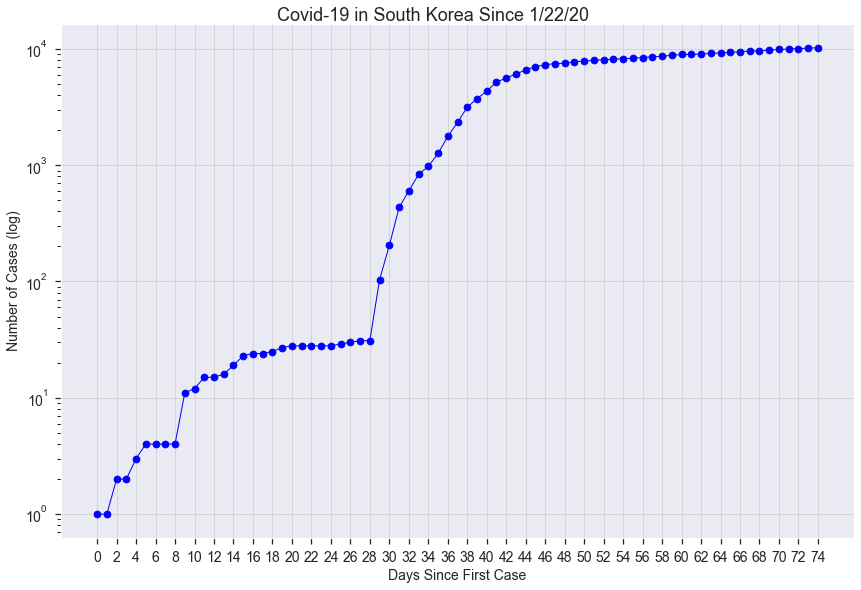

In [13]:
sk_counts = np.squeeze(sk.values)
x = np.arange(len(sk_counts))
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x, sk_counts, color='blue', s=45)
ax.plot(x, sk_counts, color='blue', linewidth=1)
ax.grid(c='lightgrey')
ax.set_xlabel('Days Since First Case', fontsize=14)
ax.set_ylabel('Number of Cases (log)', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x)+1, 2))
ax.set_yticks(np.arange(0, max(sk_counts), 1000))
ax.set_yscale(value='log')
plt.tight_layout()
fig.suptitle('Covid-19 in South Korea Since 1/22/20', fontsize=18, va='bottom')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

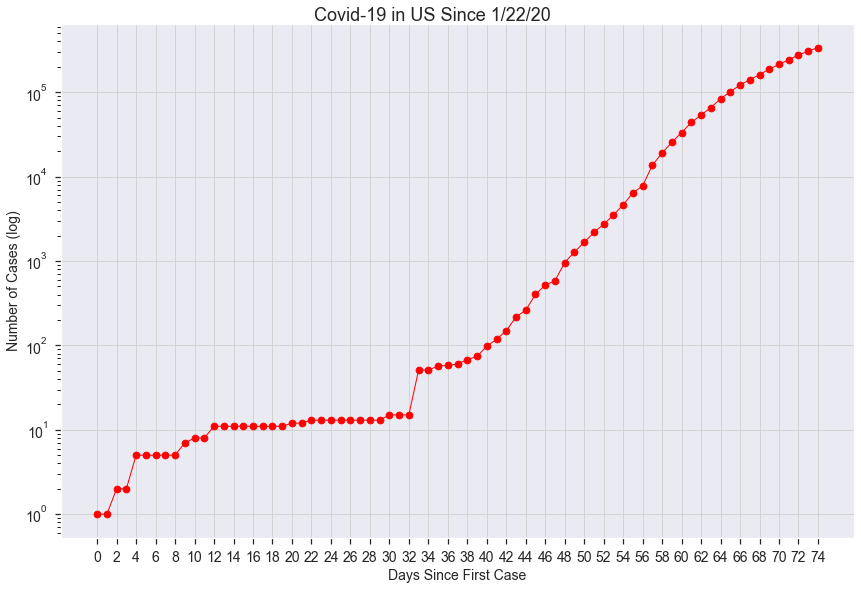

In [14]:
us_counts = np.squeeze(usa.values)
x = np.arange(len(us_counts))
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x, us_counts, color='red', s=45)
ax.plot(x, us_counts, color='red', linewidth=1)
ax.grid(c='lightgrey')
ax.set_xlabel('Days Since First Case', fontsize=14)
ax.set_ylabel('Number of Cases (log)', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x)+1, 2))
ax.set_yticks(np.arange(0, max(us_counts), 10000))
ax.set_yscale(value='log')
fig.suptitle('Covid-19 in US Since 1/22/20', fontsize=18, va='bottom')
plt.tight_layout()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

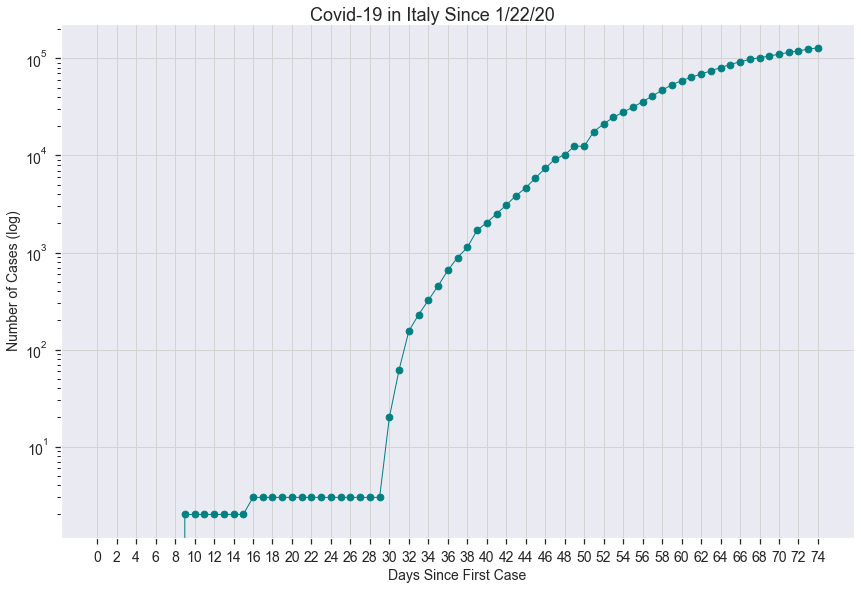

In [15]:
italy_counts = np.squeeze(italy.values)
x = np.arange(len(italy_counts))
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x, italy_counts, color='teal', s=45)
ax.plot(x, italy_counts, color='teal', linewidth=1)
ax.grid(c='lightgrey')
ax.set_xlabel('Days Since First Case', fontsize=14)
ax.set_ylabel('Number of Cases (log)', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x)+1, 2))
ax.set_yticks(np.arange(min(italy_counts), max(italy_counts), 10000))
ax.set_yscale(value='log')
plt.tight_layout()
fig.suptitle('Covid-19 in Italy Since 1/22/20', fontsize=18, va='bottom')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

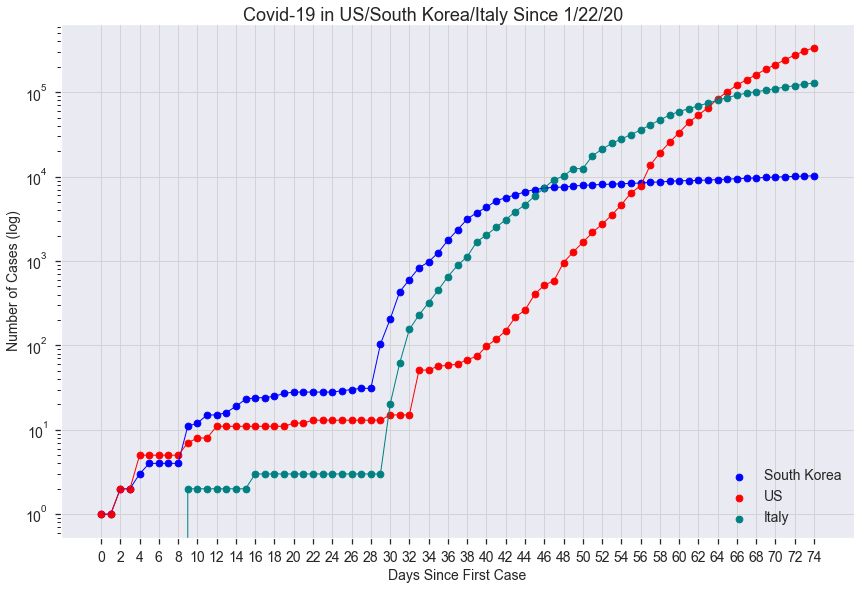

In [16]:
us_counts = np.squeeze(usa.values)
sk_counts = np.squeeze(sk.values)
italy_counts = np.squeeze(italy.values)
x = np.arange(len(sk_counts))
places = ['US', 'South Korea', 'Italy']
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x, sk_counts, color='blue', s=45, label='South Korea')
ax.plot(x, sk_counts, color='blue', linewidth=1)
ax.scatter(x, us_counts, color='red', s=45, label='US')
ax.plot(x, us_counts, color='red', linewidth=1)
ax.scatter(x, italy_counts, color='teal', s=45, label='Italy')
ax.plot(x, italy_counts, color='teal', linewidth=1)
ax.grid(c='lightgrey')
ax.set_xlabel('Days Since First Case', fontsize=14)
ax.set_ylabel('Number of Cases (log)', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x)+1, 2))
ax.set_yticks(np.arange(0, max(sk_counts), 1000))
ax.set_yscale(value='log')
plt.tight_layout()
ax.legend(loc='lower right', prop={'size': 14})
fig.suptitle('Covid-19 in US/South Korea/Italy Since 1/22/20', fontsize=18, va='bottom')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

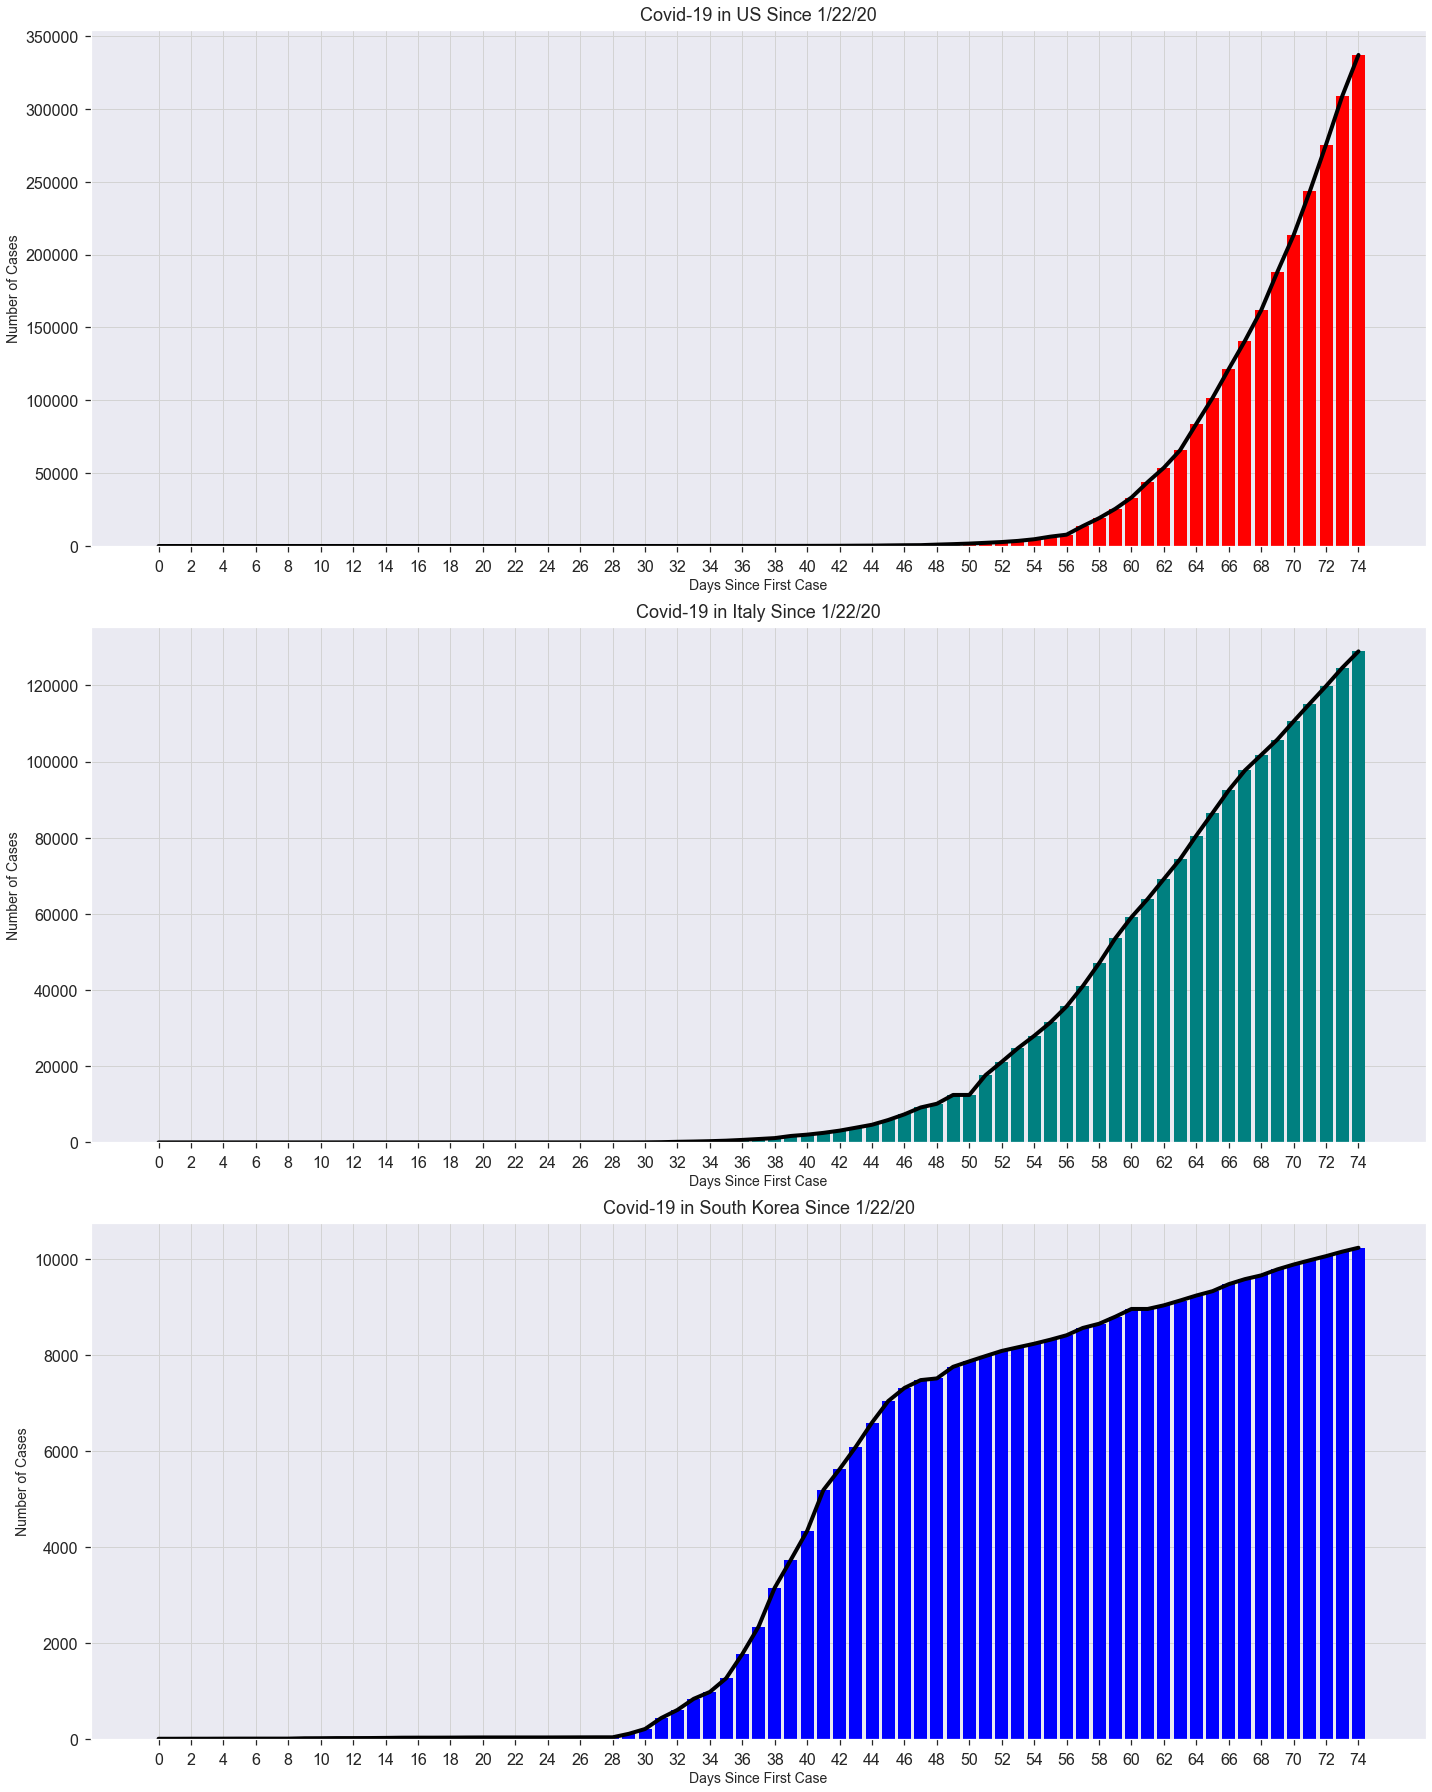

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,25))
axes = [ax1, ax2, ax3]
ax1.plot(x, us_counts, color='black', linewidth=4)
ax2.plot(x, italy_counts, color='black', linewidth=4)
ax3.plot(x, sk_counts, color='black', linewidth=4)
ax1.bar(x, us_counts, color='red')
ax2.bar(x, italy_counts, color='teal')
ax3.bar(x, sk_counts, color='blue')
for ax in axes:
    ax.set_xlabel('Days Since First Case', fontsize=14)
    ax.set_ylabel('Number of Cases', fontsize=14)
    ax.set_xticks(np.arange(min(x), max(x)+1, 2))
    ax.grid(c='lightgrey')
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)
ax1.set_title('Covid-19 in US Since 1/22/20', fontsize=18, va='bottom')
ax2.set_title('Covid-19 in Italy Since 1/22/20', fontsize=18, va='bottom')
ax3.set_title('Covid-19 in South Korea Since 1/22/20', fontsize=18, va='bottom')
plt.tight_layout()
plt.show()

# Regression

In [18]:
us_counts = usa.values
us_counts = us_counts.reshape(-1, 1)

In [19]:
us_counts = np.log(us_counts[48:, :]) # start at day 48
us_counts

array([[ 6.86589107],
       [ 7.1553963 ],
       [ 7.41637848],
       [ 7.68662133],
       [ 7.91095738],
       [ 8.16023249],
       [ 8.44074402],
       [ 8.76732915],
       [ 8.95969715],
       [ 9.52347087],
       [ 9.85744361],
       [10.14600227],
       [10.4125917 ],
       [10.68846158],
       [10.89191288],
       [11.09404071],
       [11.33661779],
       [11.52935968],
       [11.70748846],
       [11.85570633],
       [11.99415955],
       [12.14511172],
       [12.2707924 ],
       [12.40267918],
       [12.52665502],
       [12.640611  ],
       [12.72805184]])

R Squared: 0.9746135697991825
MSE: 0.08889488764054558
Intercept: 7.180151682215518
Coefficient: 0.23718036621513933


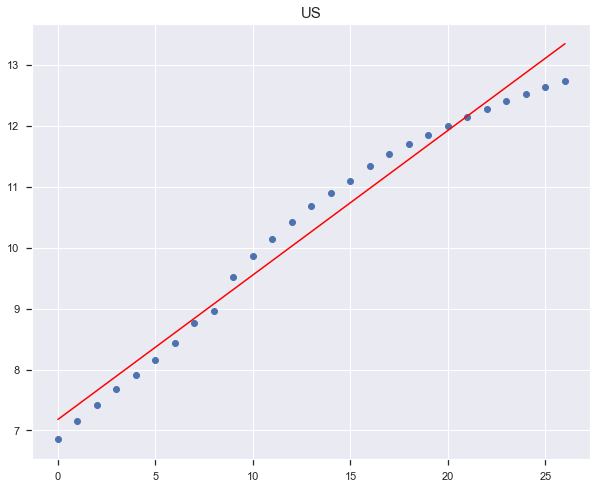

In [20]:
x = np.arange(len(us_counts)).reshape(-1, 1)
y = us_counts
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
print('R Squared:', r2_score(y, y_pred))
print('MSE:', mean_squared_error(y, y_pred))
print('Intercept:', np.squeeze(model.intercept_))
print('Coefficient:', np.squeeze(model.coef_))
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.title('US', fontsize=15)
plt.show()

In [21]:
sk_counts = sk.values
sk_counts = sk_counts.reshape(-1, 1)

In [22]:
sk_counts = np.log(sk_counts[48:, :]) # start at day 48
sk_counts

array([[8.92439013],
       [8.95609308],
       [8.97068627],
       [8.98456837],
       [8.99788945],
       [9.00724452],
       [9.01627007],
       [9.02641753],
       [9.03753341],
       [9.05543941],
       [9.06554579],
       [9.08239336],
       [9.10063711],
       [9.10063711],
       [9.10908254],
       [9.12008738],
       [9.13140538],
       [9.14120463],
       [9.1567286 ],
       [9.16774597],
       [9.17585244],
       [9.18870807],
       [9.19897604],
       [9.20793749],
       [9.21652123],
       [9.22581994],
       [9.23376389]])

R Squared: 0.9943149953106495
MSE: 4.493464645589897e-05
Intercept: 8.948316892853878
Coefficient: 0.011381832204883636


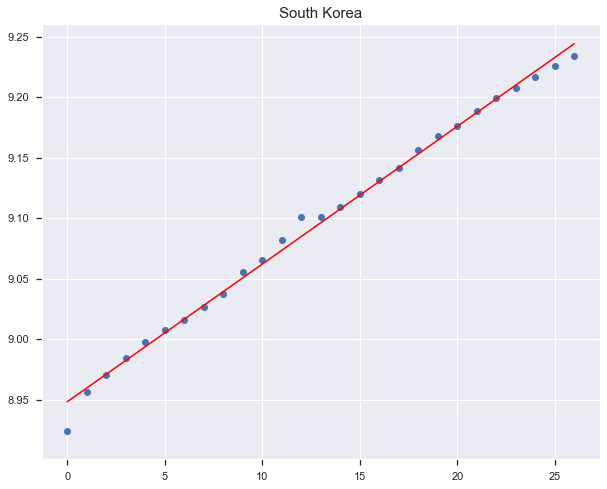

In [23]:
x = np.arange(len(sk_counts)).reshape(-1, 1)
y = sk_counts
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
print('R Squared:', r2_score(y, y_pred))
print('MSE:', mean_squared_error(y, y_pred))
print('Intercept:', np.squeeze(model.intercept_))
print('Coefficient:', np.squeeze(model.coef_))
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.title('South Korea', fontsize=15)
plt.show()